Gamelab data analysis

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle as pickle
from common_functions import get_clean_data
from common_functions import get_player_game_info, get_player_game_data, string_to_list, rational_to_double

# master (1 session), TSE (0-6 sessions), or Mturk (0-4 sessions)
exp = "master"
ses = "1"
all_choices = get_clean_data(exp,ses,"choice")
all_players = get_clean_data(exp,ses,"player")
all_games = get_clean_data(exp,ses,"game")
all_payoffs = get_clean_data(exp,ses,"payoff")
all_pasts = get_clean_data(exp,ses,"past")
all_gameplays = get_clean_data(exp,ses,"gameplay")
all_games = all_games.sort_values(['id']).reset_index(drop=True)
all_pasts = all_pasts.sort_values(['round','gameid']).reset_index(drop=True)

all_pasts.currentsp1 = all_pasts.currentsp1.apply(string_to_list)
all_pasts.currentsp2 = all_pasts.currentsp2.apply(string_to_list)

lis = [all_payoffs, all_choices, all_players, all_games, all_pasts, all_gameplays]

<class 'pandas.core.series.Series'>


How does the data look like:

In [2]:
print('Choices:')
print(all_choices.head())
print('***********************************')
print('Players:')
print(all_players.head())
print('***********************************')
print('Games:')
print(all_games.head())
print('***********************************')
print('Payoffs:')
print(all_payoffs.head())
print('***********************************')
print('Pasts:')
print(all_pasts.head())
print('***********************************')
print('Gameplays:')
print(all_gameplays.head())

Choices:
   Unnamed: 0  round       strats  stratsz  playerid  gameid  sessid  \
0           1      1        1 0 0        3        22       3      64   
1           2      1      1/2 1/2        2        22       1      64   
2           3      1  0 1/2 1/2 0        4        22       2      64   
3           4      1      1 0 0 0        4        22       4      64   
4           5      1  0 1/2 1/2 0        4        22       5      64   

      created  id  
0  1444021914  21  
1  1444021968  22  
2  1444022014  23  
3  1444022142  24  
4  1444022182  25  
***********************************
Players:
   Unnamed: 0                 email  hitid  assignmentid  mturkdone  state  \
0           1  40744@student.hhs.se    NaN           NaN          0      2   
1           3      alice@hallman.se    NaN           NaN          0      2   
2           5  22356@student.hhs.se    NaN           NaN          0      2   
3           6  40855@student.hhs.se    NaN           NaN          0      2   
4  

First period strats data for simulations and models

In [5]:
#with open(f"data/data_dicts_{exp}{ses}.pkl", 'rb') as input: 
#    df = pickle.load(input)

#df = pd.DataFrame(df)
#df.head()

Sandbox

In [20]:
import functools
def add(x,y,z,w):
    return z*(x + y)+w

inc2 = functools.partial(add, 2,3)
inc2(2,3)

13

First we provide plots for the average play

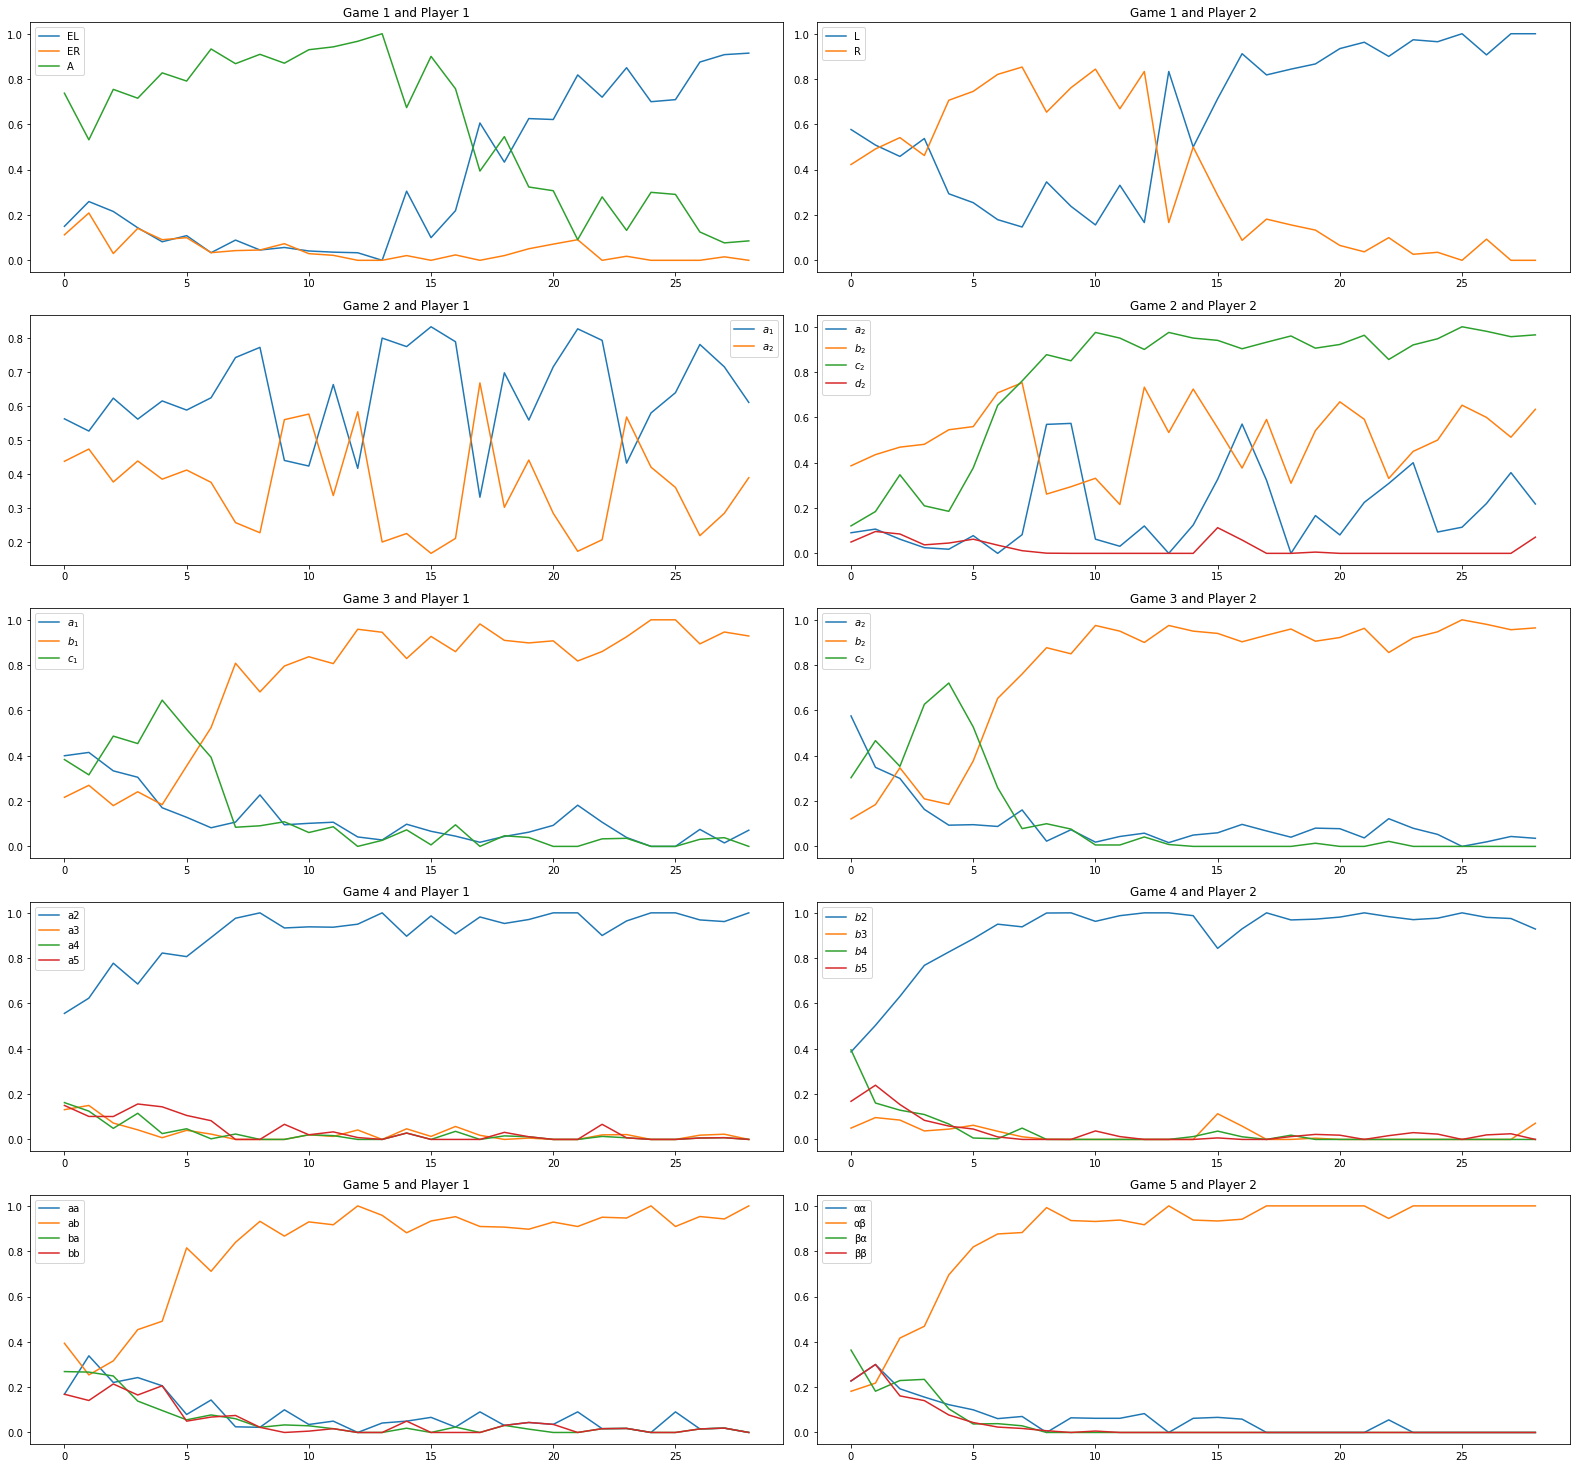

In [10]:

avg_strats1 = []
avg_strats2 = []
for gid in all_games.id.unique():
    avg_strats1.append(list(map(list,zip(*all_pasts.currentsp1[all_pasts['gameid']==gid]))))
    avg_strats2.append(list(map(list,zip(*all_pasts.currentsp2[all_pasts['gameid']==gid]))))
fig, axs = plt.subplots(5, 2)    
fig.set_size_inches(22, 20.5)
axs[0, 0].plot(avg_strats1[0][0], label='EL')
axs[0, 0].plot(avg_strats1[0][1], label='ER')
axs[0, 0].plot(avg_strats1[0][2], label='A')
axs[0, 0].set_title("Game 1 and Player 1")
axs[0, 0].legend()
axs[1, 0].plot(avg_strats1[1][0], label='$a_1$')
axs[1, 0].plot(avg_strats1[1][1], label='$a_2$')
axs[1, 0].set_title("Game 2 and Player 1")
axs[1, 0].legend()
axs[2, 0].plot(avg_strats1[2][0], label='$a_1$')
axs[2, 0].plot(avg_strats1[2][1], label='$b_1$')
axs[2, 0].plot(avg_strats1[2][2], label='$c_1$')
axs[2, 0].set_title("Game 3 and Player 1")
axs[2, 0].legend()
axs[3, 0].plot(avg_strats1[3][0], label='a2')
axs[3, 0].plot(avg_strats1[3][1], label='a3')
axs[3, 0].plot(avg_strats1[3][2], label='a4')
axs[3, 0].plot(avg_strats1[3][3], label='a5')
axs[3, 0].set_title("Game 4 and Player 1")
axs[3, 0].legend()
axs[4, 0].plot(avg_strats1[4][0], label='aa')
axs[4, 0].plot(avg_strats1[4][1], label='ab')
axs[4, 0].plot(avg_strats1[4][2], label='ba')
axs[4, 0].plot(avg_strats1[4][3], label='bb')
axs[4, 0].set_title("Game 5 and Player 1")
axs[4, 0].legend()

axs[0, 1].plot(avg_strats2[0][0], label='L')
axs[0, 1].plot(avg_strats2[0][1], label='R')
axs[0, 1].legend()
axs[0, 1].set_title("Game 1 and Player 2")
axs[1, 1].plot(avg_strats2[1][0], label='$a_2$')
axs[1, 1].plot(avg_strats2[1][1], label='$b_2$')
axs[1, 1].plot(avg_strats2[2][1], label='$c_2$')
axs[1, 1].plot(avg_strats2[3][1], label='$d_2$')
axs[1, 1].set_title("Game 2 and Player 2")
axs[1, 1].legend()
axs[2, 1].plot(avg_strats2[2][0], label='$a_2$')
axs[2, 1].plot(avg_strats2[2][1], label='$b_2$')
axs[2, 1].plot(avg_strats2[2][2], label='$c_2$')
axs[2, 1].set_title("Game 3 and Player 2")
axs[2, 1].legend()
axs[3, 1].plot(avg_strats2[3][0], label='$b2$')
axs[3, 1].plot(avg_strats2[3][1], label='$b3$')
axs[3, 1].plot(avg_strats2[3][2], label='$b4$')
axs[3, 1].plot(avg_strats2[3][3], label='$b5$')
axs[3, 1].set_title("Game 4 and Player 2")
axs[3, 1].legend()
axs[4, 1].plot(avg_strats2[4][0], label='\u03B1\u03B1')
axs[4, 1].plot(avg_strats2[4][1], label='\u03B1\u03B2')
axs[4, 1].plot(avg_strats2[4][2], label='\u03B2\u03B1')
axs[4, 1].plot(avg_strats2[4][3], label='\u03B2\u03B2')
axs[4, 1].set_title("Game 5 and Player 2")
axs[4, 1].legend()

fig.tight_layout()


Now instead, distance to equilibrium

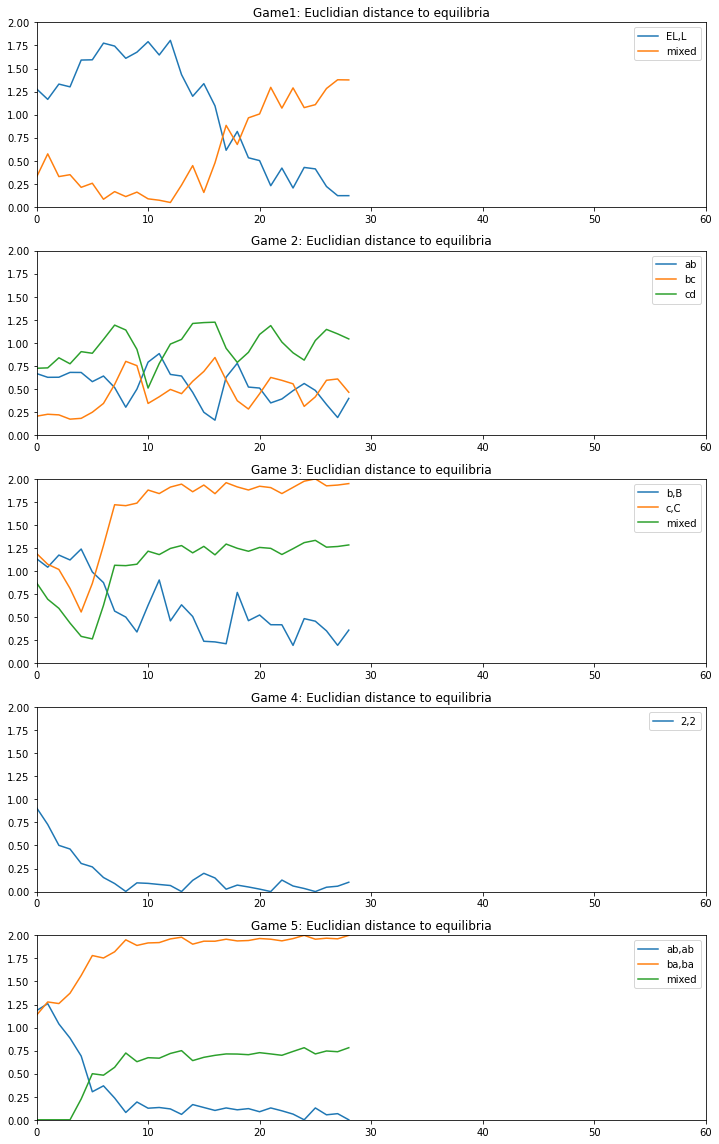

In [194]:
from scipy.optimize import minimize
import functools

# Game 1
el = np.dot(np.array([[1,0,0]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))
A = np.dot(np.array([[0,0,1]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))
l= np.dot(np.array([[1,0]]).T,np.array([np.ones(len(all_choices['round'].unique()))])) 
a1 = (el-avg_strats1[0])**2
b1 = (l-avg_strats2[0])**2
c1 = np.sqrt(a1[0]+a1[1]+a1[2]+b1[0]+b1[1])

def fun(a,b,x):
    return (x[0]-a)**2+(x[1]-b)**2
cons = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] -1})
bnds = ((0, 2/3), (1/3, 1))

lfunc = lambda x: minimize(functools.partial(fun,x[0],x[1]), (1/2, 1/2), method='SLSQP', bounds=bnds, constraints=cons)
wow = pd.DataFrame(avg_strats2[0]).apply(lfunc)
wow = [r.x for r in wow]
wow = [list(x) for x in wow]
aa1 = (A-avg_strats1[0])**2
bb1 = (np.array(wow).T-avg_strats2[0])**2
cc1 = np.sqrt(aa1[0]+aa1[1]+aa1[2]+bb1[0]+bb1[1])


# Game 2
ab1 = np.dot(np.array([[3/4,1/4]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))
bc1 = np.dot(np.array([[1/2,1/2]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))
cd1 = np.dot(np.array([[1/4,3/4]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))

ab2 = np.dot(np.array([[1/2,1/2,0,0]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))
bc2 = np.dot(np.array([[0,1/2,1/2,0]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))
cd2 = np.dot(np.array([[0,0,1/2,1/2]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))

a2 = (ab1-avg_strats1[1])**2
b2 = (ab2-avg_strats2[1])**2
c2 = np.sqrt(a2[0]+a2[1]+b2[0]+b2[1]+b2[2]+b2[3])

aa2 = (bc1-avg_strats1[1])**2
bb2 = (bc2-avg_strats2[1])**2
cc2 = np.sqrt(aa2[0]+aa2[1]+bb2[0]+bb2[1]+bb2[2]+bb2[3])

aaa2 = (cd1-avg_strats1[1])**2
bbb2 = (cd2-avg_strats2[1])**2
ccc2 = np.sqrt(aaa2[0]+aaa2[1]+bbb2[0]+bbb2[1]+bbb2[2]+bbb2[3])

# Game 3
bB1 = np.dot(np.array([[0,1,0]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))
cC1 = np.dot(np.array([[0,0,1]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))
m1 = np.dot(np.array([[0,1/3,2/3]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))

bB2 = np.dot(np.array([[0,1,0]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))
cC2 = np.dot(np.array([[0,0,1]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))
m2 = np.dot(np.array([[0,1/3,2/3]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))

a3 = (bB1-avg_strats1[2])**2
b3 = (bB2-avg_strats2[2])**2
c3 = np.sqrt(a3[0]+a3[1]+a3[2]+b2[0]+b2[1]+b2[2])

aa3 = (cC1-avg_strats1[2])**2
bb3 = (cC2-avg_strats2[2])**2
cc3 = np.sqrt(aa3[0]+aa3[1]+aa3[2]+bb3[0]+bb3[1]+bb3[2])

aaa3 = (m1-avg_strats1[2])**2
bbb3 = (m2-avg_strats2[2])**2
ccc3 = np.sqrt(aaa3[0]+aaa3[1]+aaa3[2]+bbb3[0]+bbb3[1]+bbb3[2])


# Game 4
a2b21 = np.dot(np.array([[1,0,0,0]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))

a2b22 = np.dot(np.array([[1,0,0,0]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))

a4 = (a2b21-avg_strats1[3])**2
b4 = (a2b22-avg_strats2[3])**2
c4 = np.sqrt(a4[0]+a4[1]+a4[2]+a4[3]+b4[0]+b4[1]+b4[2]+b4[3])


# Game 5
abab1 = np.dot(np.array([[0,1,0,0]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))
baba1 = np.dot(np.array([[0,0,1,0]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))


abab2 = np.dot(np.array([[0,1,0,0]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))
baba2 = np.dot(np.array([[0,0,1,0]]).T,np.array([np.ones(len(all_choices['round'].unique()))]))

a5 = (abab1-avg_strats1[4])**2
b5 = (abab2-avg_strats2[4])**2
c5 = np.sqrt(a5[0]+a5[1]+a5[2]+a5[3]+b5[0]+b5[1]+b5[2]+b5[3])

aa5 = (baba1-avg_strats1[4])**2
bb5 = (baba2-avg_strats2[4])**2
cc5 = np.sqrt(aa5[0]+aa5[1]+aa5[2]+aa5[3]+bb5[0]+bb5[1]+bb5[2]+bb5[3])

def fun2(a,b,c,d,x):
    return (x[0]-a)**2+(x[3]-d)**2+x[1]+x[2]
def fun3(a,b,c,d,x):
    return (x[0]-a)**2+(x[1]-b)**2+(x[2]-c)**2+(x[3]-d)**2

bnds2 = ((0, 1),(0, 1),(0, 1),(0, 1))
bnds3 = ((0, 1),(0, 1/2),(0, 1/2),(0, 1))
cons2 = ({'type': 'eq', 'fun': lambda x:  x[0] + x[1] + x[2] + x[3] -1})

lfunc2 = lambda x: minimize(functools.partial(fun2,x[0],x[1],x[2],x[3]), (1/4,0,0,3/4), method='SLSQP', bounds=bnds2, constraints=cons2)
lfunc3 = lambda x: minimize(functools.partial(fun3,x[0],x[1],x[2],x[3]), (1/4,1/4,1/4,1/4), method='SLSQP', bounds=bnds3, constraints=cons2)
wow2a = pd.DataFrame(avg_strats1[4]).apply(lfunc2)
wow2a = [r.x for r in wow2a]
wow2a = [list(x) for x in wow2a]
wow3a = pd.DataFrame(avg_strats2[4]).apply(lfunc3)
wow3a = [r.x for r in wow3a]
wow3a = [list(x) for x in wow3a]

wow2b = pd.DataFrame(avg_strats2[4]).apply(lfunc2)
wow2b = [r.x for r in wow2b]
wow2b = [list(x) for x in wow2b]
wow3b = pd.DataFrame(avg_strats1[4]).apply(lfunc3)
wow3b = [r.x for r in wow3b]
wow3b = [list(x) for x in wow3b]


aaa5a = (np.array(wow2a).T-avg_strats1[4])**2
bbb5a = (np.array(wow3a).T-avg_strats2[4])**2
aaa5b = (np.array(wow3b).T-avg_strats1[4])**2
bbb5b = (np.array(wow2b).T-avg_strats2[4])**2

aaa5 = np.minimum(aaa5a,aaa5b)
bbb5 = np.minimum(bbb5a,bbb5b)

ccc5 = np.sqrt(aaa5[0]+aaa5[1]+aaa5[2]+aaa5[3]+bbb5[0]+bbb5[1]+bbb5[2]+bbb5[3])


fig, axs = plt.subplots(5, 1)    
fig.set_size_inches(10, 16)
axs[0].plot(c1, label='EL,L')
axs[0].plot(cc1, label='mixed')
axs[0].set_title("Game1: Euclidian distance to equilibria")
axs[0].set_xlim([0, 60])
axs[0].set_ylim([0, 2])
axs[0].legend()
axs[1].plot(c2, label='ab')
axs[1].plot(cc2, label='bc')
axs[1].plot(ccc2, label='cd')
axs[1].set_title("Game 2: Euclidian distance to equilibria")
axs[1].set_xlim([0, 60])
axs[1].set_ylim([0, 2])
axs[1].legend()
axs[2].plot(c3, label='b,B')
axs[2].plot(cc3, label='c,C')
axs[2].plot(ccc3, label='mixed')
axs[2].set_title("Game 3: Euclidian distance to equilibria")
axs[2].set_xlim([0, 60])
axs[2].set_ylim([0, 2])
axs[2].legend()
axs[3].plot(c4, label='2,2')
axs[3].set_title("Game 4: Euclidian distance to equilibria")
axs[3].set_xlim([0, 60])
axs[3].set_ylim([0, 2])
axs[3].legend()
axs[4].plot(c5, label='ab,ab')
axs[4].plot(cc5, label='ba,ba')
axs[4].plot(ccc5, label='mixed')
axs[4].set_title("Game 5: Euclidian distance to equilibria")
axs[4].set_xlim([0, 60])
axs[4].set_ylim([0, 2])
axs[4].legend()

fig.tight_layout()



In [ ]:
plt.plot(all_pasts.currentsp1[all_pasts.gameid==1][0])
all_choices
all_choices.stratsz[all_choices.gameid==1]
for i in range(1,1+len(all_pasts.currentsp1[all_pasts.gameid==1][0].split())):
    print(i)
len(all_pasts.currentsp1[all_pasts.gameid==1][0].split())

In [63]:

same_array = pd.DataFrame(columns=['gameid','round','playerid'])
pure_array = pd.DataFrame(columns=['gameid','round','playerid'])
for pid in all_players.id.unique():
    for gid in all_games.id.unique():
        info = get_player_game_info(pid, gid, all_choices, all_players, all_games)
        data = get_player_game_data(pid, gid, all_payoffs, all_choices, all_players, all_games, all_pasts, all_gameplays)
        for round_ in data['round']:
            if np.max(data.strats[data['round']==round_].iloc[0]) == 1:
                pure_array[gid,round,pid] = 1
            else:
                pure_array[gid,round,pid] = 0
            if (idx > 1) & (round > 1):
                same_array[gid+1,round,pid] = 0
                if(all(data$strats[[idx]] == data$strats[[idx - 1]])):
                    same_array[gid+1,round,pid] = 1

pid_pure = matrix(nrow= max(all_players$id),ncol=nrgames+1)
pid_plays = matrix(nrow= max(all_players$id),ncol=nrgames+1)
pid_same = matrix(nrow= max(all_players$id),ncol=nrgames+1)


colnames(pid_pure) <- c("All", all_games$name)
colnames(pid_plays) <- c("All", all_games$name)
colnames(pid_same) <- c("All", all_games$name)

for(pid in unique(all_players$id)){
  pid_pure[pid,1] = mean(pure_array[,,pid], na.rm = T)
  pid_plays[pid,1] = sum(!is.na(pure_array[,,pid]))
  pid_same[pid,1] = mean(same_array[,,pid], na.rm=T)
  for(gid in unique(all_games$id)){
    pid_pure[pid,gid+1] = mean(pure_array[gid+1,,pid], na.rm = T)
    pid_plays[pid,gid+1] = sum(!is.na(pure_array[gid+1,,pid]))
    pid_same[pid,gid+1] = mean(same_array[gid+1,,pid], na.rm=T)
  }
}

pid_rounds = data.frame(na.omit(pid_plays[,2]))

colnames(pid_rounds) <- c("Rounds")


print(xtable(summary(pid_rounds, digits=2), caption="Summary statistics for number of plays"), file=paste("../Outputs/ssfnop_",exp,ses,".tex",sep=""))
print(xtable(summary(na.omit(pid_pure), digits=2), caption="Summary statistics for share pure plays"), file=paste("../Outputs/ssfsopp_",exp,ses,".tex",sep=""))
print(xtable(summary(na.omit(pid_same), digits=2), caption="Summary statistics for share same plays"), file=paste("../Outputs/ssfsosp_",exp,ses,".tex",sep=""))
print(xtable(na.omit(pid_same), caption="Per player statistics for share same plays"), file=paste("../Outputs/ppsfsosp_",exp,ses,".tex",sep=""))
print(xtable(na.omit(pid_pure), caption="Summary statistics for share same plays"), file=paste("../Outputs/ppsfsopp_",exp,ses,".tex",sep=""))

#print(xtable(sum), file = "sharestra.tex")


summary_mat = matrix(nrow = 2, ncol=nrgames+1)

summary_mat[1,1] = mean(pure_array, na.rm=T)
summary_mat[2,1] = mean(same_array, na.rm=T)

for(gid in unique(all_games$id)){
  summary_mat[1,gid] = mean(pure_array[gid,,], na.rm=T)
  summary_mat[2,gid] = mean(same_array[gid,,], na.rm=T)
}

colnames(summary_mat) <- c("All", all_games$name)
rownames(summary_mat) <- c("Pure", "Same")



print(xtable(summary_mat, digits=2, caption="Summary statistics for same and pure strategy play"), file=paste("../Outputs/ssfsapsp_",exp,ses,".tex",sep=""))


per_round_pure = matrix(nrow=nrgames+1, ncol=max(all_gameplays$round))
per_round_same = matrix(nrow=nrgames+1, ncol=max(all_gameplays$round))

for(round in 1:max(all_gameplays$round)){
  per_round_pure[1,round] = mean(pure_array[,round,], na.rm=T)
  per_round_same[1,round] = mean(same_array[,round,], na.rm=T)
  for(gid in unique(all_games$id)){
    per_round_pure[gid+1,round] = mean(pure_array[gid+1,round,], na.rm=T)
    per_round_same[gid+1,round] = mean(same_array[gid+1,round,], na.rm=T)
  }
}

pdf( file=paste("../Outputs/same_pure_plot_",exp,ses,".pdf",sep=""), width=15, height=7)
par(mfrow=c(2,((nrgames+1)/2)))
for(i in 1:(nrgames+1)){
  if(i==1){str="All"}else{str=paste("Game ", i-1)}
  plot(per_round_pure[i,], type="l", ylim=c(0,1), main=str, ylab = "share", xlab="round")
  lines(per_round_same[i,], lty=2)
}

SyntaxError: invalid syntax (<ipython-input-63-2a2b8bafc165>, line 14)